# Dependencies

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

# Create the directory Structure
Create separate runnable code blocks to feed into the data downloader

In [3]:
#Create initial folder for the black widow spider images
folder = 'black'
file = 'black_widow_spiders'

In [4]:
#Create initial folder for the brown recluse spider images
folder = 'brown'
file = 'brown_recluse_spider'

In [5]:
#Set the path for the spider images
path = Path('../storage/spiderman')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

# Make the subset creator
We want to pull a small sample from the main spider black widow and brown recluse directories.  The remaining images will serve as the training images.

The function subset_creator takes the arguments:
* origin_folder: folder name (e.g. brown) that we will use as the pool for pulling the subset from
* dest_folder: folder name (e.g. brown_subset) that we will use for training on the subset
* subset_n: number of images to put into the subset

In [6]:
import os
import shutil
        
def subset_creator(folder, valid_pct):
    #randomly selects a subset of the parent folder and copies to the subset folder
    #folder: where files originate
    #valid_pct: how many should be part of the subset
    
    training = os.path.join(path,'train',folder) #site of training folder
    origin = os.path.join(path,folder) #site of origin folder, where all images are located
    validation = os.path.join(path,'valid',folder) #site of validation folder
    
    #make subdirectories
    if os.path.exists(training):
        shutil.rmtree(training)
    if os.path.exists(validation):
        shutil.rmtree(validation)
    os.makedirs(training, exist_ok=True)
    os.makedirs(validation, exist_ok=True)
    
    #loop through the pool directory and decide randomly if image will go to valid or train directory based on valid_pct
    origin_files = os.listdir(origin)
    for file in origin_files:
        if np.random.rand(1) < valid_pct:
            shutil.copy(os.path.join(origin,file), validation)
        else: shutil.copy(os.path.join(origin,file), training)



In [89]:
# #create the subsets:
# subset_creator('brown', 0.2)
# subset_creator('black', 0.2)

# Download Images

In [7]:
classes = ['black', 'brown']

In [ ]:
download_images(path/folder/file, dest, max_pics = 200)

Error http://www.city-data.com/forum/attachments/nature/99557d1344629640-brown-recluse-spider.jpg 'content-length'
Error https://bloximages.chicago2.vip.townnews.com/paducahsun.com/content/tncms/assets/v3/editorial/d/4e/d4ed292c-6fa8-5939-aa59-a535859bccac/5aed4500e13a6.image.jpg?resize=1200%2C1070 'content-length'
Error http://www.greenshieldpestcontrol.com/wp-content/uploads/2018/03/wolfspider-1024x681.jpg 'content-length'
Error https://48qbc13dv397vzass1iql2a1-wpengine.netdna-ssl.com/wp-content/uploads/2011/10/Brown-recluse-D-Keyler-300x288.jpg 'content-length'
Error https://cdn-www.terminix.com/cs/terminix/image/how-big-is-a-brown-recluse.jpg 'content-length'
Error https://www.diehardsurvivor.com/wp-content/uploads/sites/905/2017/04/brown-recluse.jpg 'content-length'


Process Process-6:
Process Process-3:
Process Process-7:
Process Process-8:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File

In [8]:
#delete unusable images
for c in classes:  
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

black


brown


/opt/conda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [91]:
#np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct = 0.7,
#                                   ds_tfms=get_transforms(), size=224, num_workers=4, bs=40).normalize(imagenet_stats)
data = ImageDataBunch.from_folder(path, train='train', valid='valid',
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [92]:
data.classes

['black', 'brown']

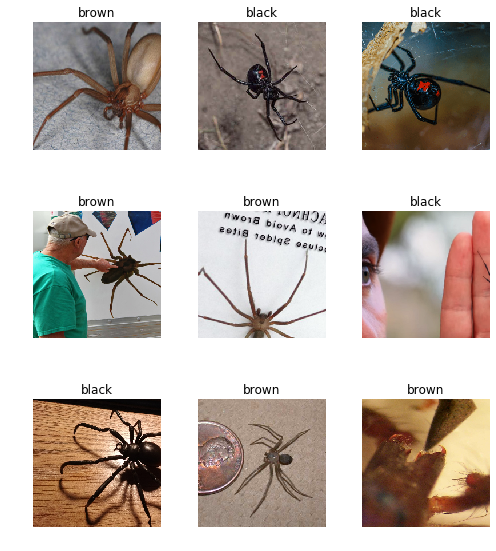

In [93]:
data.show_batch(rows=3,figsize=(7,8))

In [94]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'brown'], 2, 262, 94)

# Train model

In [95]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate])

In [96]:
learn.fit_one_cycle(4)

Total time: 00:33
epoch  train_loss  valid_loss  error_rate
1      0.581024    0.289601    0.117021    (00:08)
2      0.478123    0.249668    0.074468    (00:08)
3      0.377320    0.292614    0.074468    (00:08)
4      0.303090    0.313115    0.074468    (00:08)



In [98]:
learn.unfreeze()

In [84]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


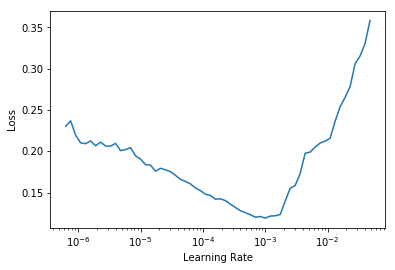

In [85]:
learn.recorder.plot()

In [99]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 1e-4))

Total time: 00:37
epoch  train_loss  valid_loss  error_rate
1      0.150445    0.350559    0.095745    (00:09)
2      0.127494    0.311551    0.074468    (00:09)
3      0.151466    0.306328    0.074468    (00:10)
4      0.144093    0.303790    0.074468    (00:08)



In [106]:
# errors = []
errors.append(learn.recorder.metrics[3])

In [111]:
os.path.join(path,train)

'../storage/spiderman/'

In [125]:
filenames_black = os.listdir(os.path.join(path,'valid','black'))

In [130]:
array = np.array([2,3,4,5])

In [134]:
np.vstack((array,[5,6,7,8])) 
    

array([[2, 3, 4, 5],
       [5, 6, 7, 8]])

In [ ]:
learn.recorder.metrics[3], filenames_black, filenames_black)

# Intepretation

In [38]:
learn.load('stage-2')

In [80]:
interp = ClassificationInterpretation.from_learner(learn)

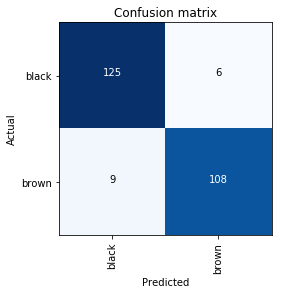

In [81]:
interp.plot_confusion_matrix()

# Recursive High Value Image Finder

In [8]:
def plot_MVP(k, figsize=(12,12)):
        "Show images in `mvp` along with their associated mean accuracy"
        filename,mean = final_dataframe_mean['filename'], final_dataframe_mean['mean']
        filename = [os.path.join(path, filename) for filename in final_dataframe_mean['filename']]
        img0 = plt.imread(filename[0])
        img1 = plt.imread(filename[1])
        img2 = plt.imread(filename[2])
        img3 = plt.imread(filename[3])
        
        fig,axes = plt.subplots(2,2,figsize=figsize)
        
        axes[0,0].imshow(img0)
        axes[0,0].title.set_text(mean.iloc[0])
        axes[0,1].imshow(img1)
        axes[0,1].title.set_text(mean.iloc[1])
        axes[1,0].imshow(img2)
        axes[1,0].title.set_text(mean.iloc[2])
        axes[1,1].imshow(img3)        
        axes[1,1].title.set_text(mean.iloc[3])
                

In [9]:
pd.set_option('display.max_rows', 500)

def MVP(repetitions):
    
    #initialize empty final dataframe
    global final_dataframe_mean
    final_dataframe = pd.DataFrame (
        {
            
            "filename": [],
            "error_null": []
        }
    )
    
    #repetitions: how many epochs to do 
    for i in range(repetitions):
        #Build the folders based on the subset percentage
        subset_creator('brown', 0.2)
        subset_creator('black', 0.2)

        #Create the data object using train and valid folders
        data = ImageDataBunch.from_folder(path, train='train', valid='valid',
                                          ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

        #Create the learner
        learn = create_cnn(data, models.resnet34, metrics=error_rate)
        learn.unfreeze()
        learn.fit_one_cycle(4, max_lr=slice(3e-5, 1e-4))
        
        #create the filenames
        filenames_black = os.listdir(os.path.join(path,'valid','black'))
        filenames_black = ['black/' + black for black in filenames_black] 
        filenames_brown = os.listdir(os.path.join(path,'valid','brown'))
        filenames_brown = ['brown/' + brown for brown in filenames_brown]
        filenames_total = filenames_black + filenames_brown
        #grab the error rate for last epoch
        error=learn.recorder.metrics[3]    
        
        #create new dataframe
        new_dataframe = pd.DataFrame (
                {
                    "filename": filenames_total,
                    "error"+str(i): error * len(filenames_total)
                }
            )    
        
        #append new_dataframe to final_dataframe
        final_dataframe = final_dataframe.merge(new_dataframe, on='filename', how='outer')
        
        
    final_dataframe = final_dataframe.drop(labels='error_null', axis=1)
    mean = final_dataframe.mean(axis=1, skipna=None, numeric_only=True)
    final_dataframe_mean = final_dataframe.assign(mean=mean)
    final_dataframe_mean = final_dataframe_mean.sort_values('mean')
    return final_dataframe_mean


In [10]:
MVP(10)

Total time: 00:32
epoch  train_loss  valid_loss  error_rate
1      0.818830    0.396808    0.168831    (00:08)
2      0.673640    0.192088    0.038961    (00:07)
3      0.545801    0.123358    0.000000    (00:07)
4      0.456894    0.118329    0.000000    (00:08)



,filename,error0,error1,error2,error3,error4,error5,error6,error7,error8,error9,mean
311,brown/00000121.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
309,brown/00000040.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
308,brown/00000141.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
307,brown/00000183.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
306,brown/00000123.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
305,black/00000076.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
304,black/00000092.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
310,brown/00000162.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
303,black/00000019.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
302,black/00000127.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000


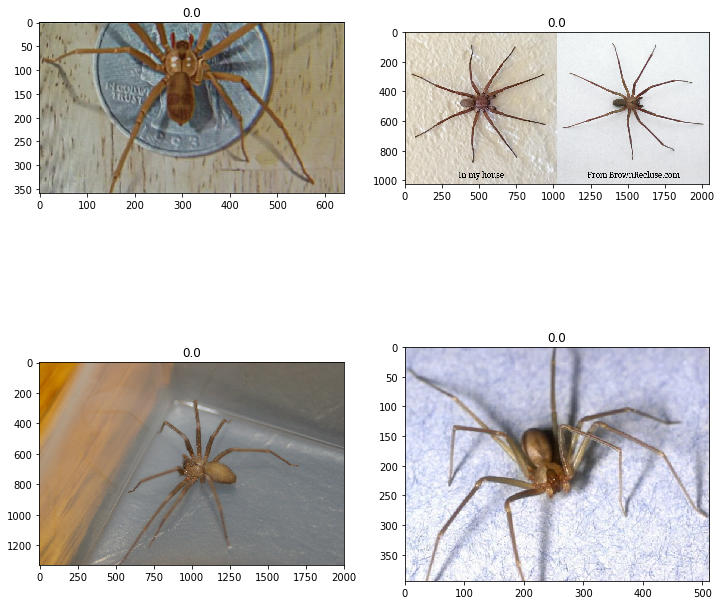

In [11]:
plot_MVP(final_dataframe_mean)

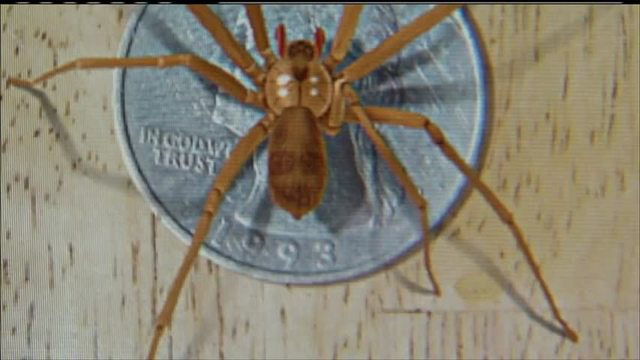

In [12]:
open_image(os.path.join(path,'brown/00000121.jpg'))